In [1]:
import torch
import numpy as np
import pandas as pd
import os
from PINNs.aesthetics import *
import analytics.collect_ensemble_data
import analytics.plot
from equations.forward_problems.navier_stokes import Navier_Stokes as Eq_naive
from equations.forward_problems.navier_stokes_scale_separation import Navier_Stokes_scale_separation as Eq_together

torch.nn.Module.dump_patches = True
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

np.random.seed(42)
torch.manual_seed(42)

In [2]:
args = {'Re': 100}#, 'path_to_best_big_scale': 'data/test_big_scale'}
eq_naive = Eq_naive(**args)
eq_together = Eq_together(**args)

In [3]:
p_naive = 'data/Navier_stokes_equation/' + str(args['Re']) + '/naive'
p_together = 'data/Navier_stokes_equation/' + str(args['Re']) + '/separation_new'

paths = [p_naive, p_together]

In [4]:
mpinn = [False, False]
model_wrapper = [False, False]
rescale = [None, None]
eqs = [eq_naive, eq_together]

In [5]:
data = list()
data.append(analytics.collect_ensemble_data.collect_ensemble_data(paths[0]))
data.append(analytics.collect_ensemble_data.collect_ensemble_data(paths[1]))

In [6]:
stashed_total = list()
for i in range(len(data)):
    stashed_total.append(analytics.collect_ensemble_data.stash_retrainings(data[i], 'unweighted_total_loss'))

In [7]:
best_overall = list()
for i in range(len(stashed_total)):
    best_overall.append(analytics.collect_ensemble_data.get_best_setup(stashed_total[i], 'unweighted_total_loss', paths[i]))

/usr/local/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


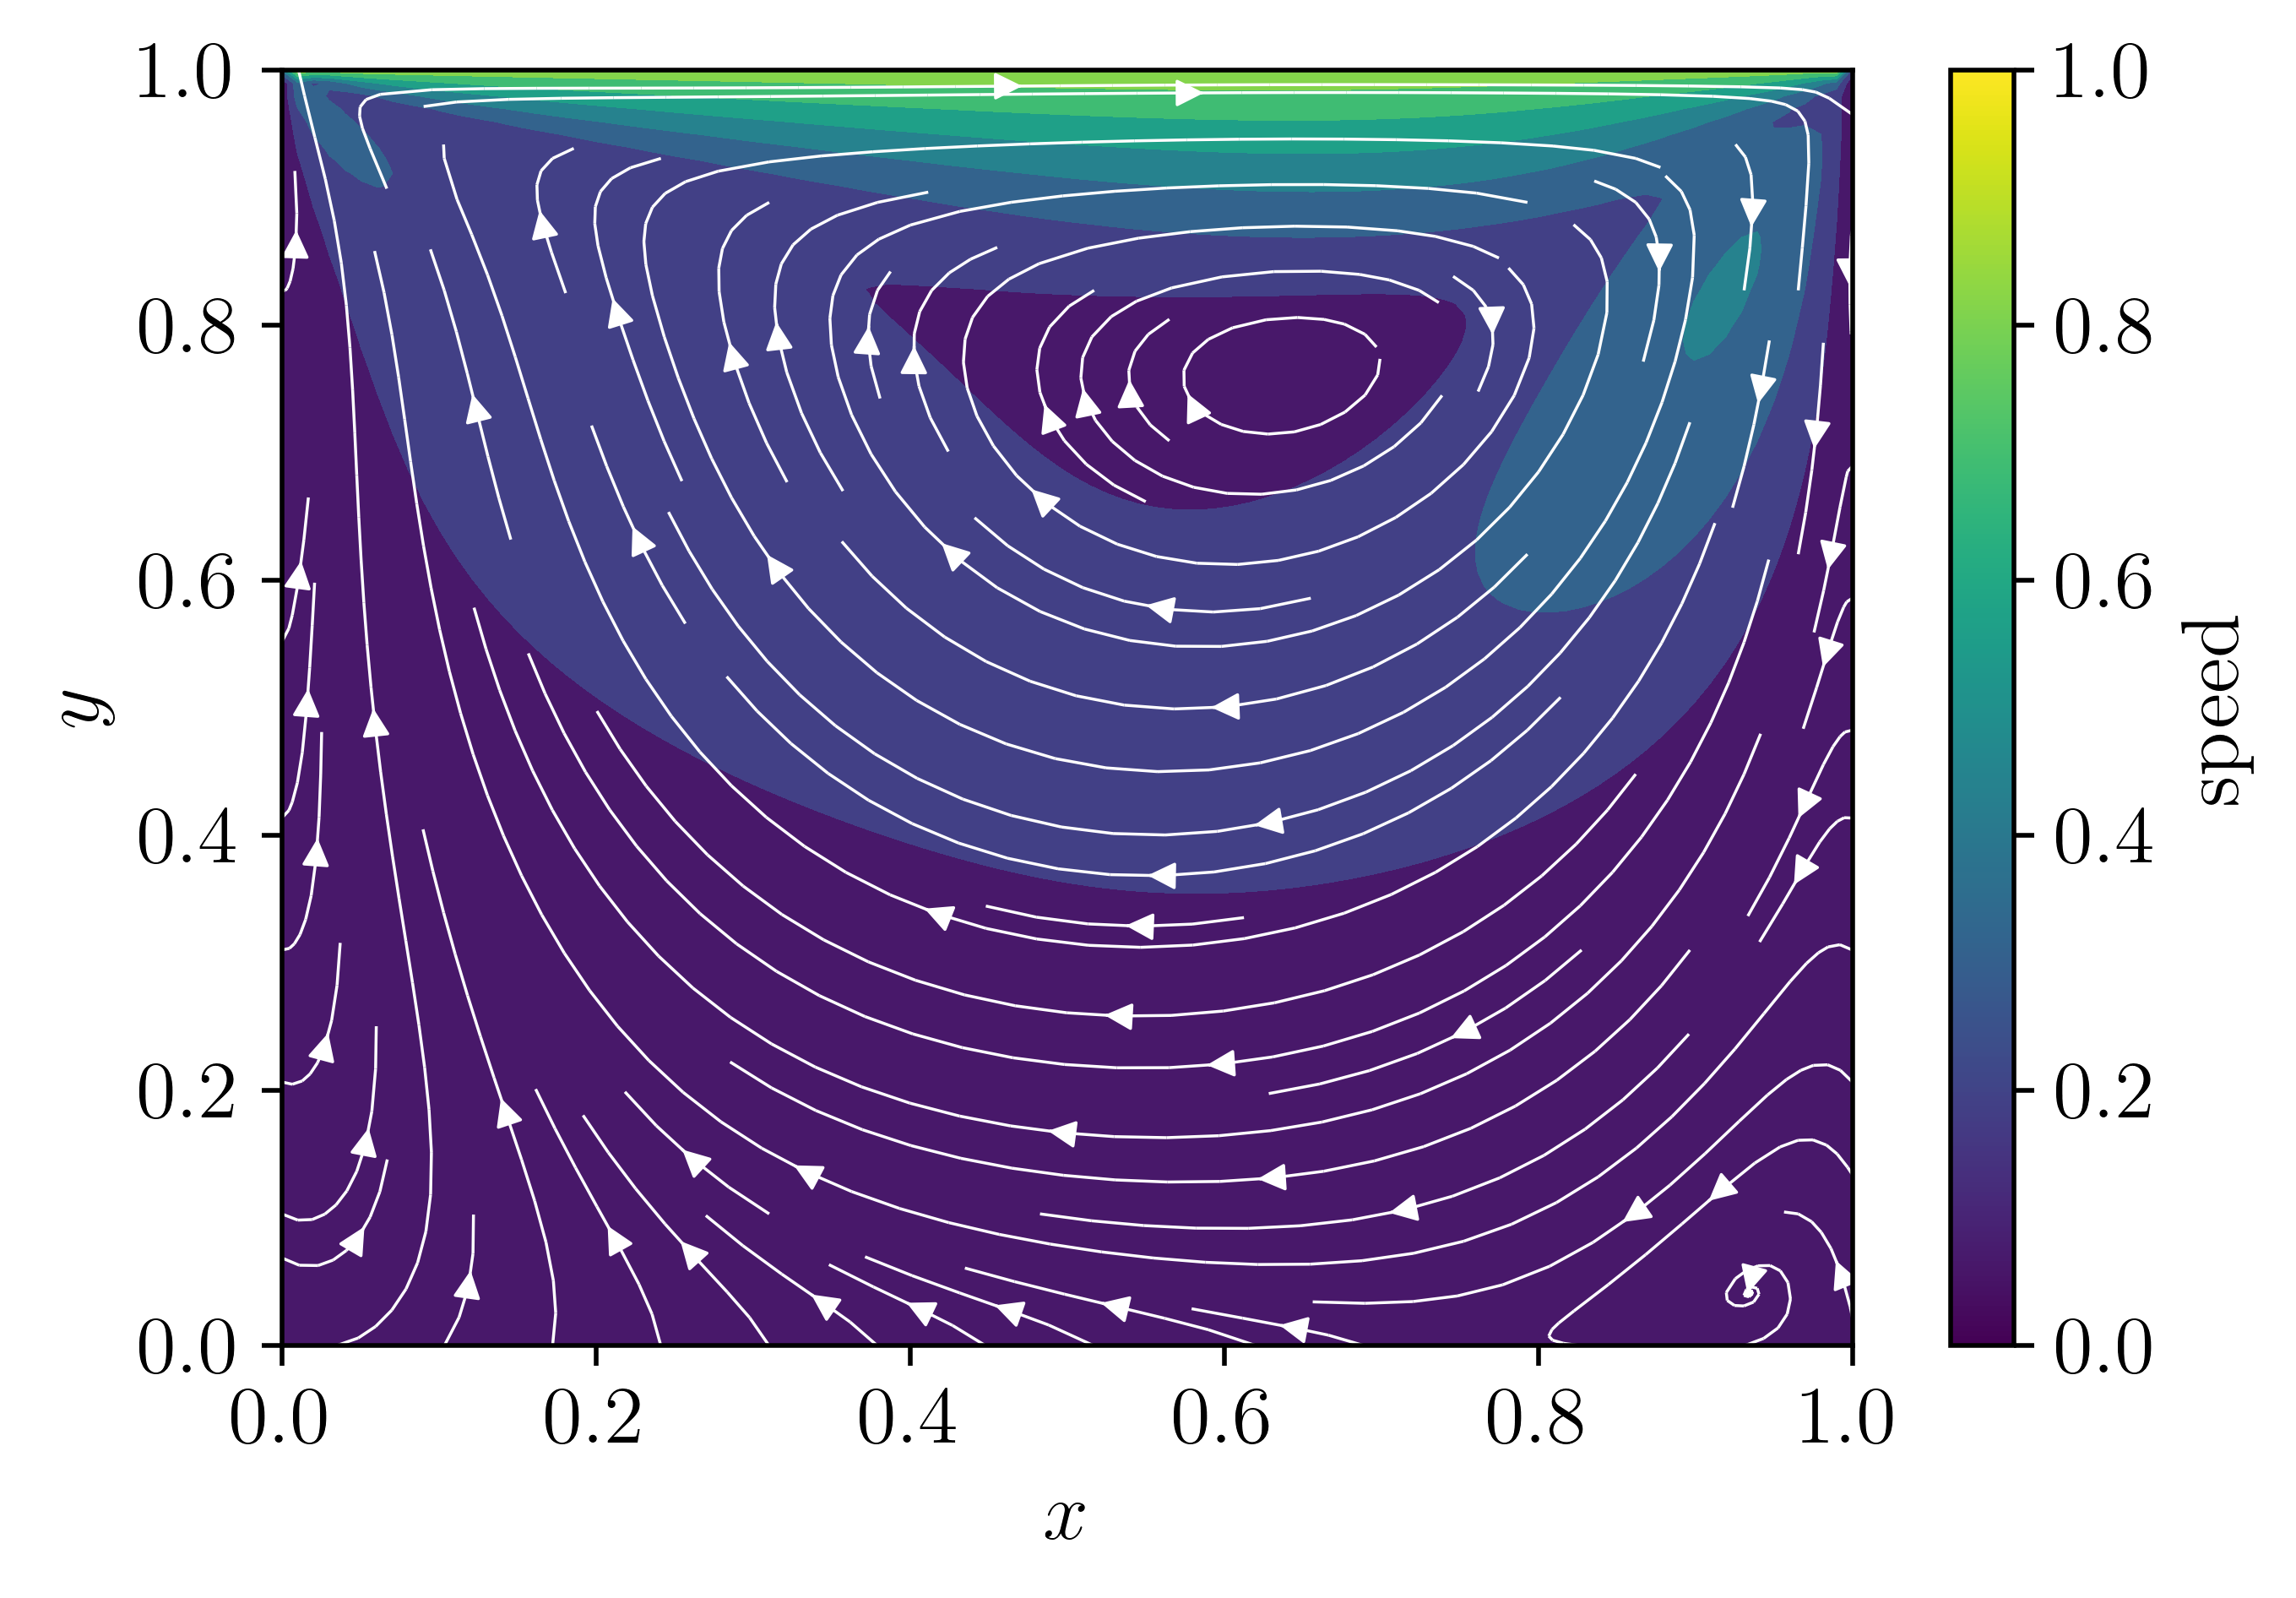

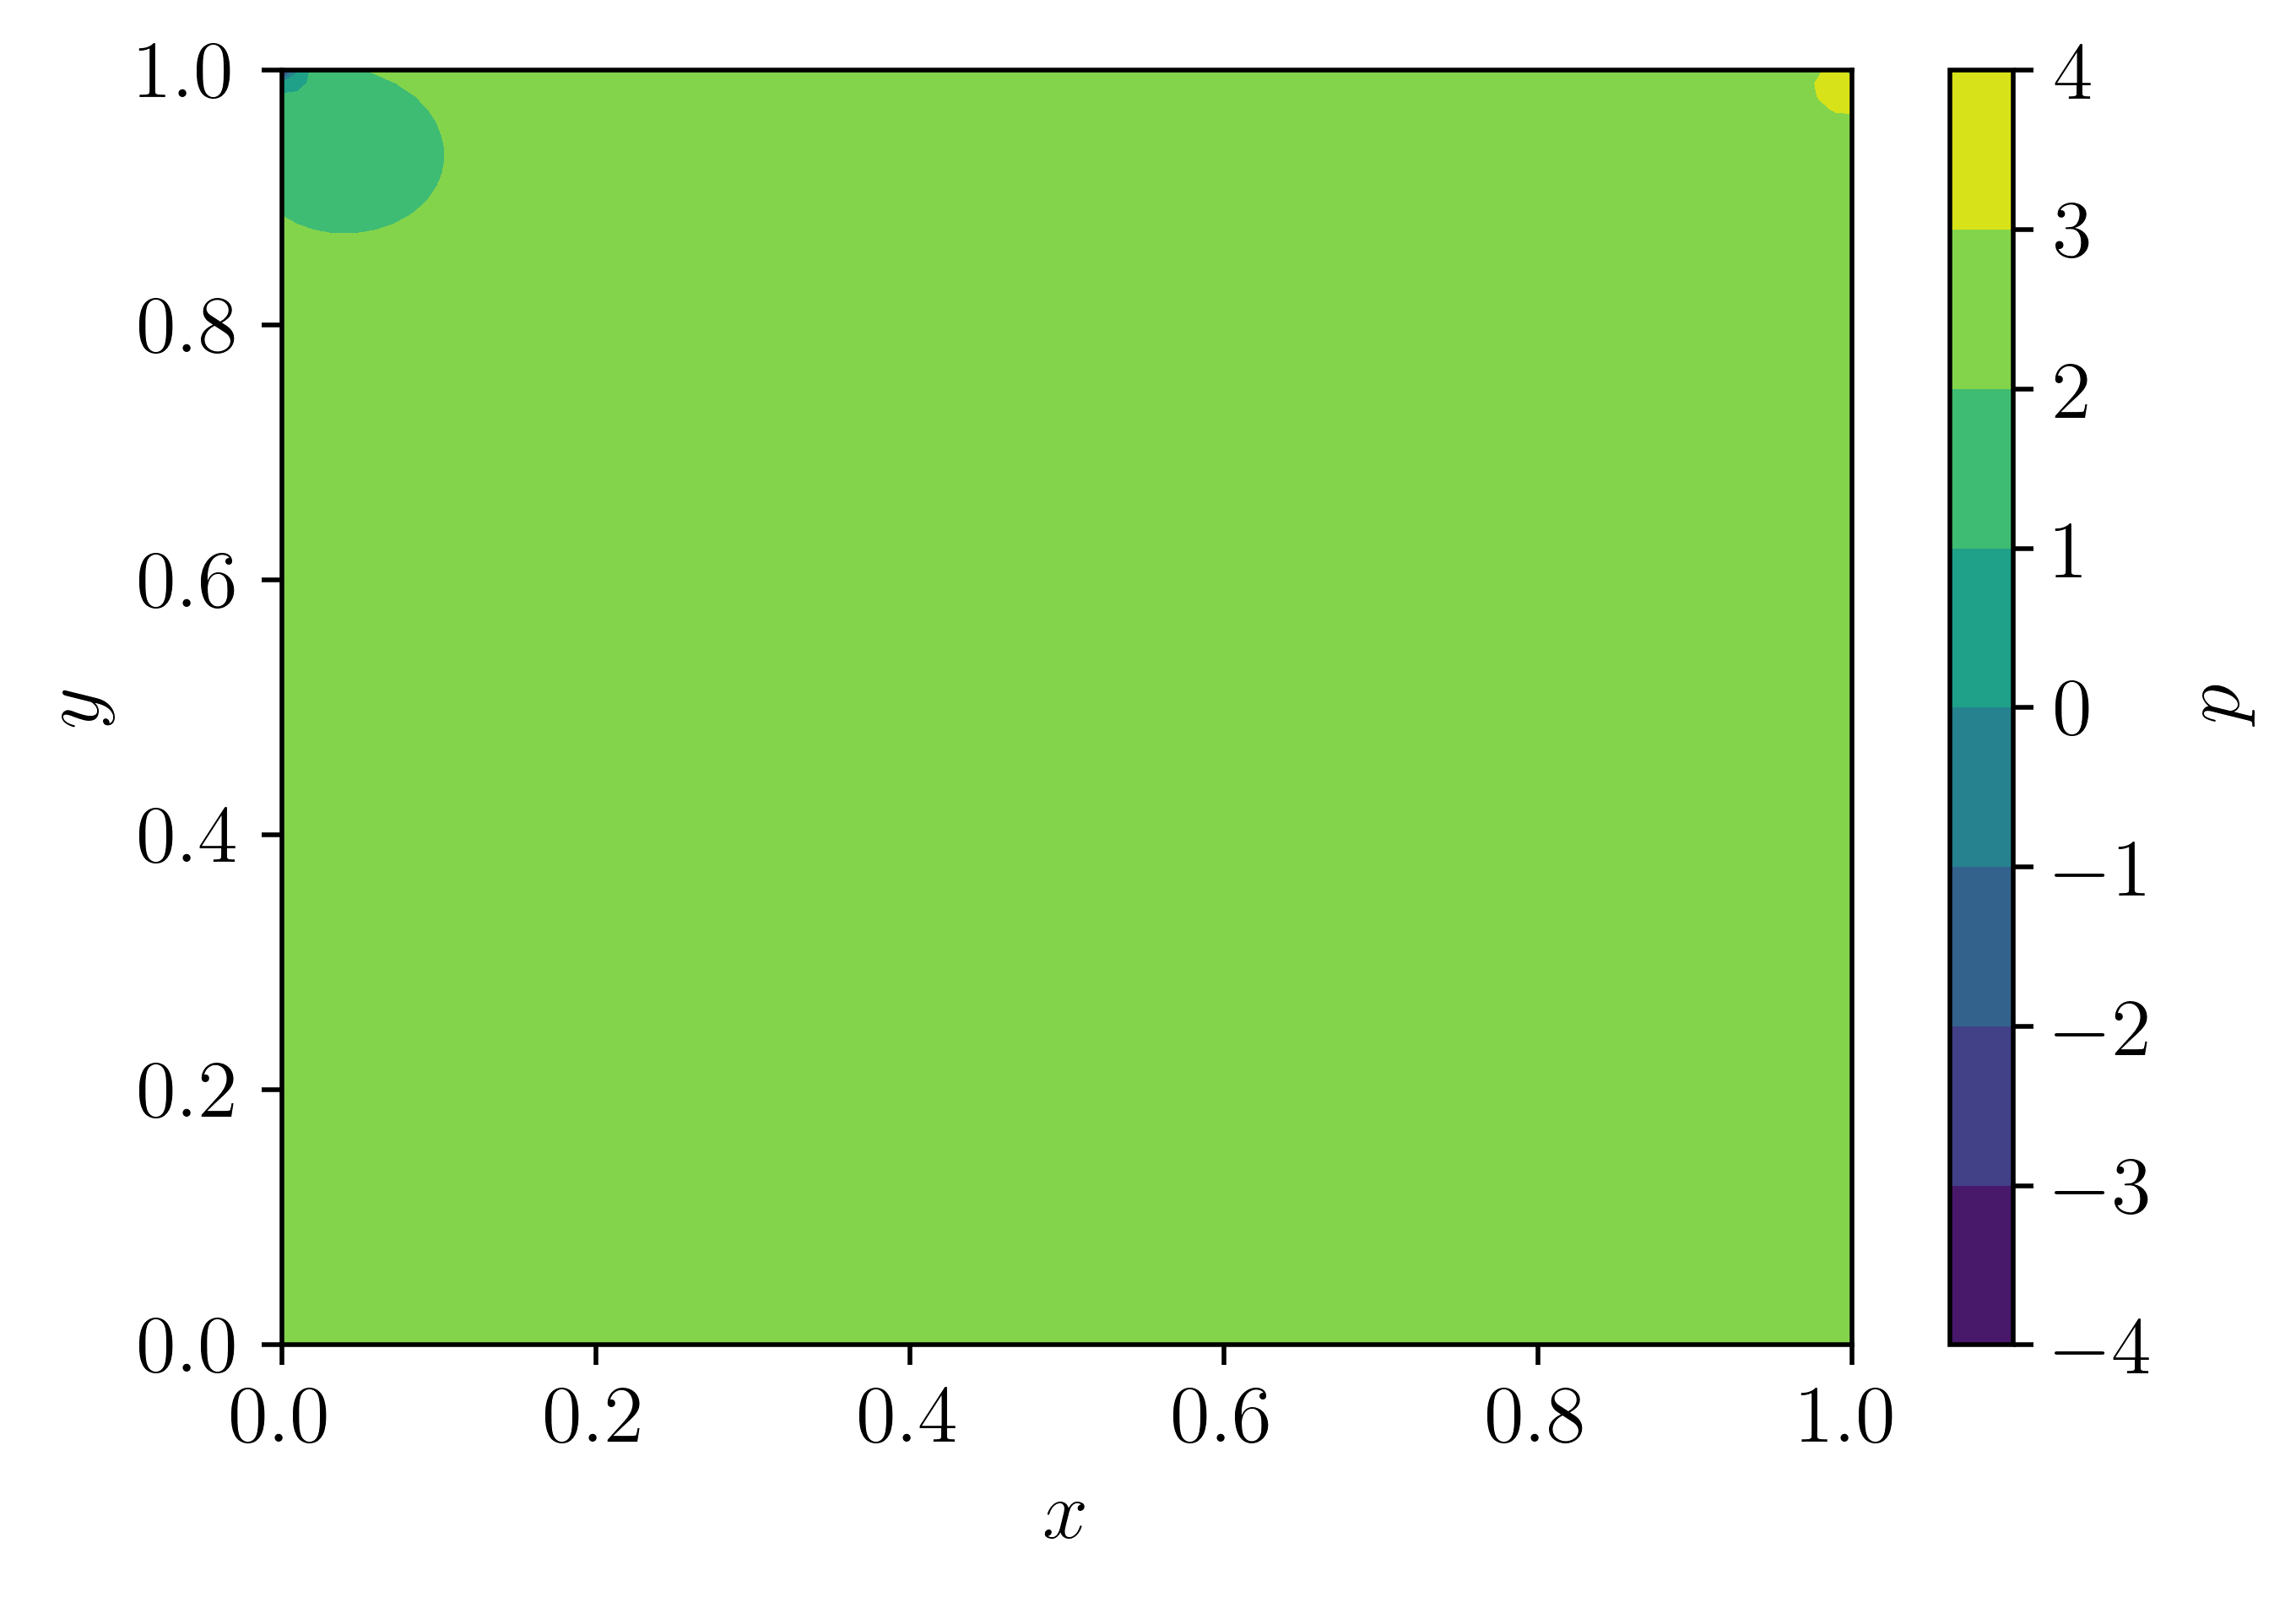

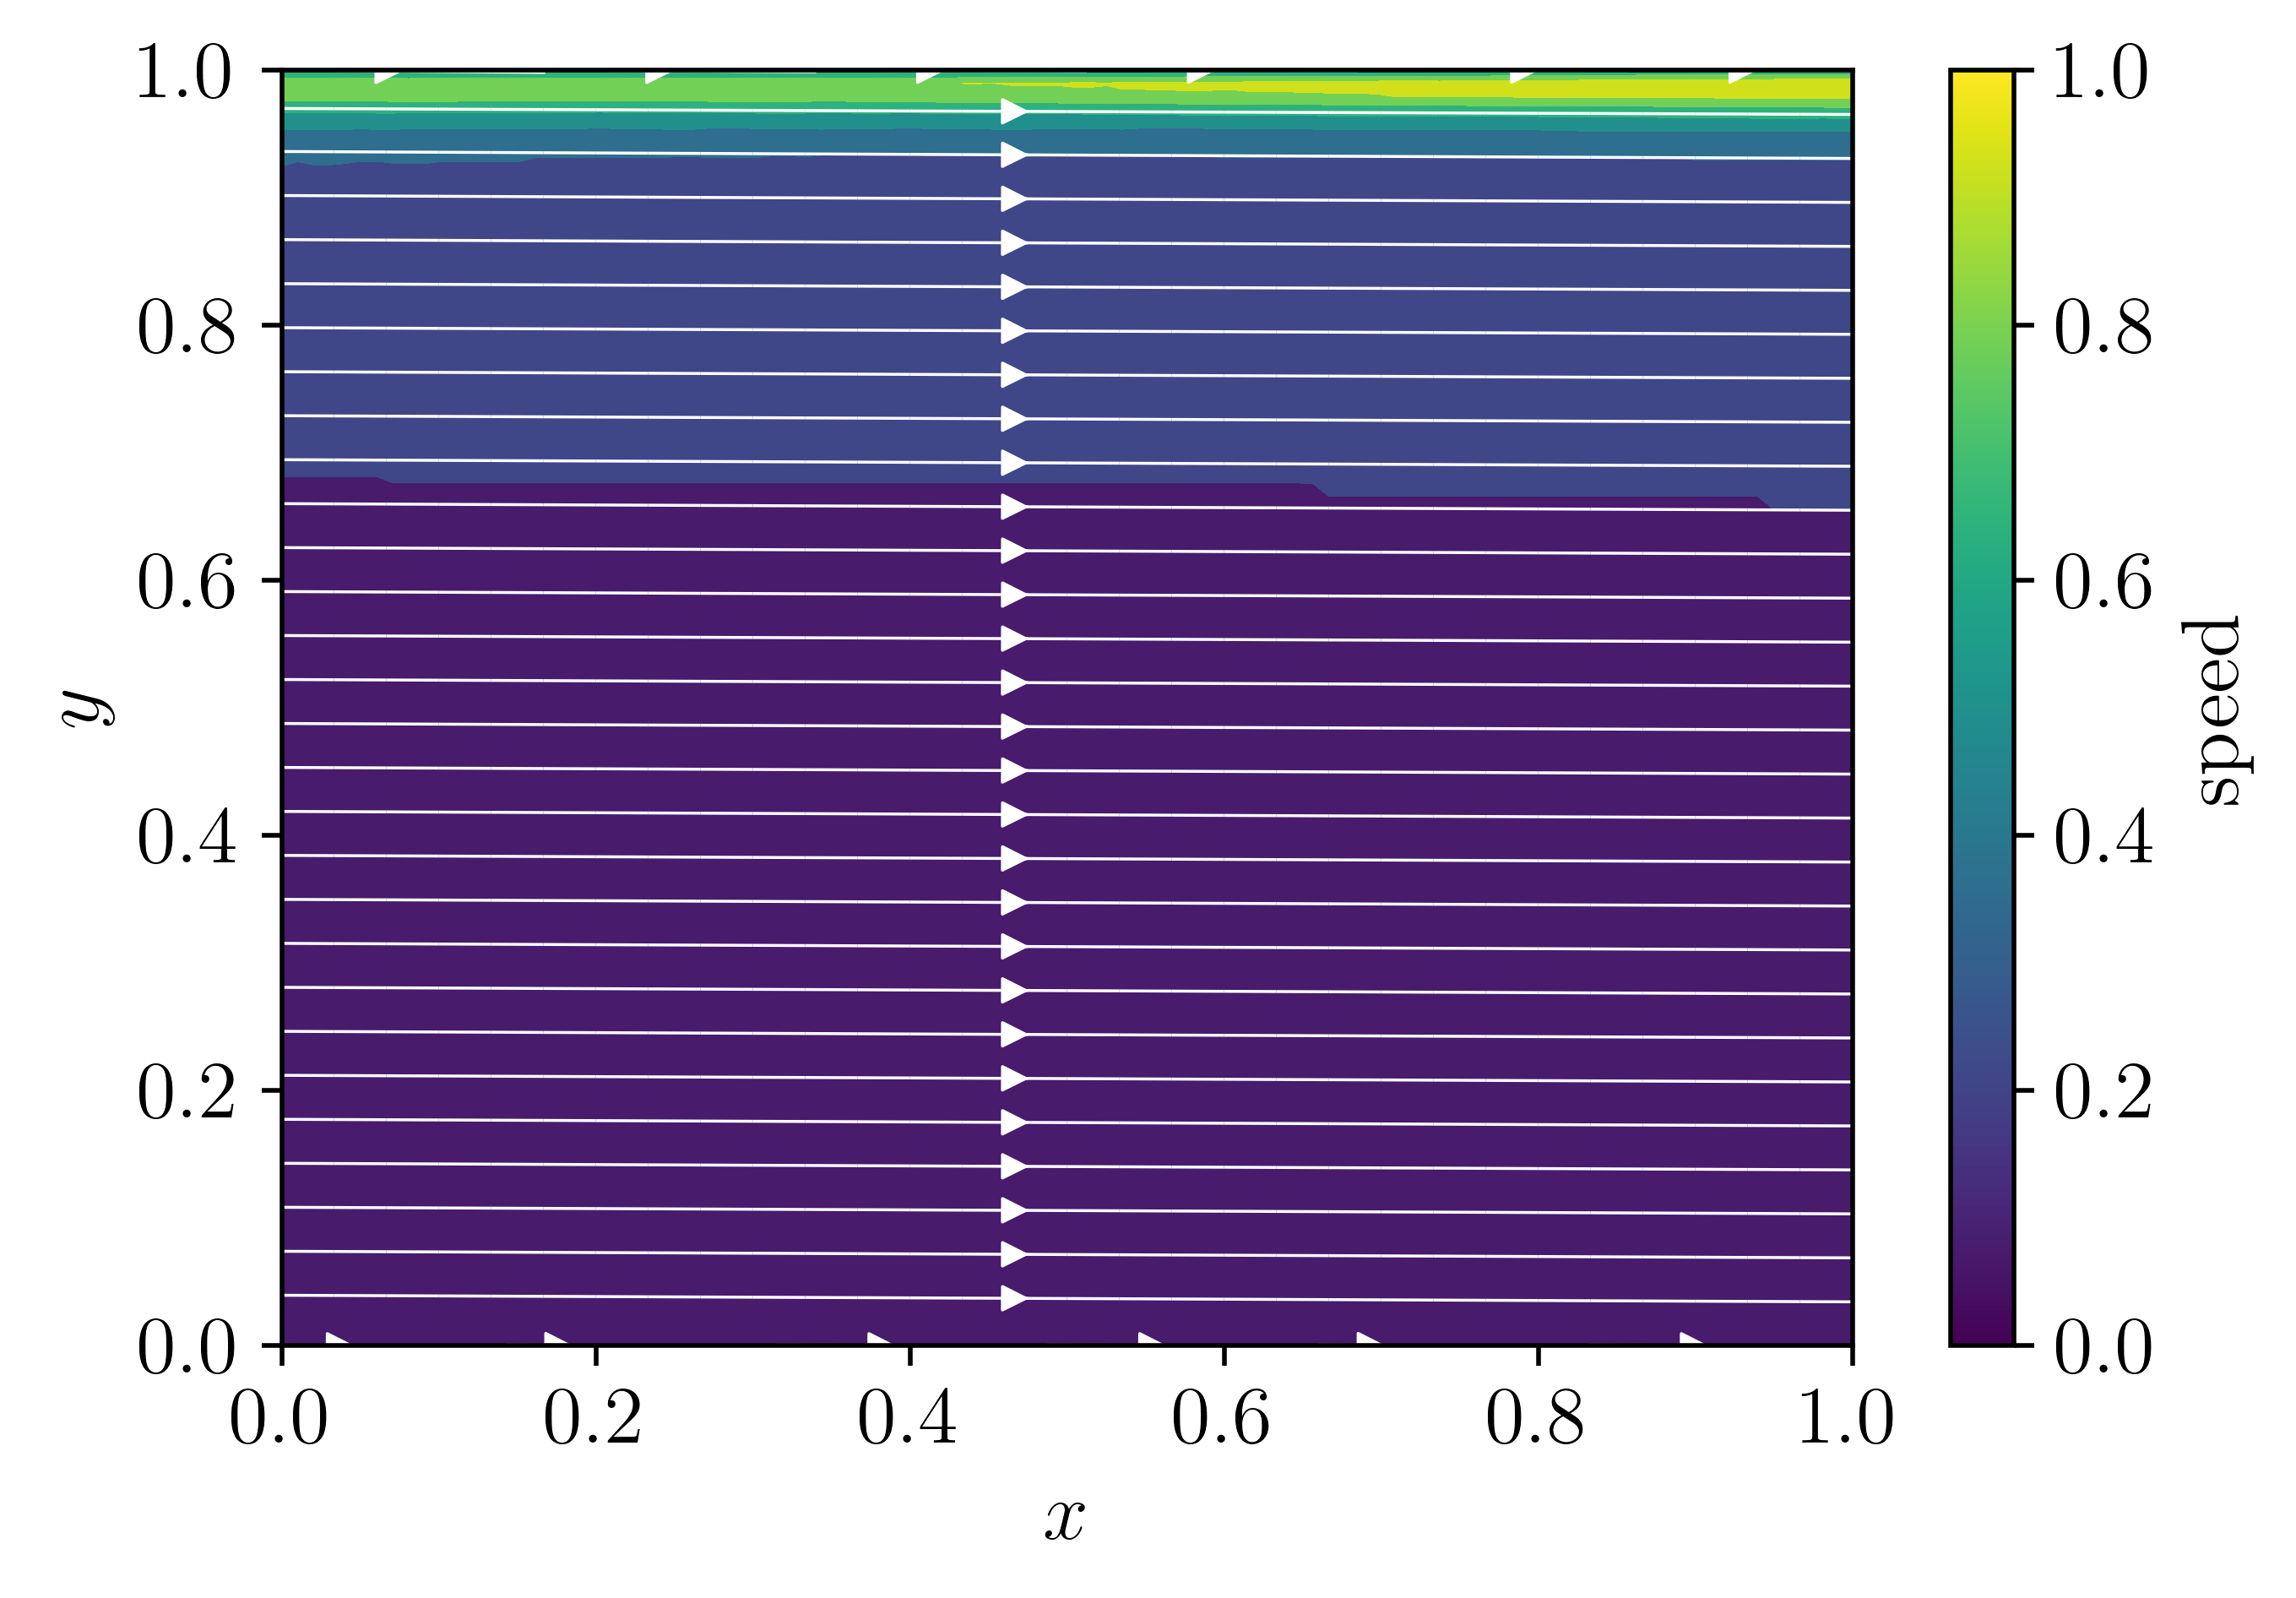

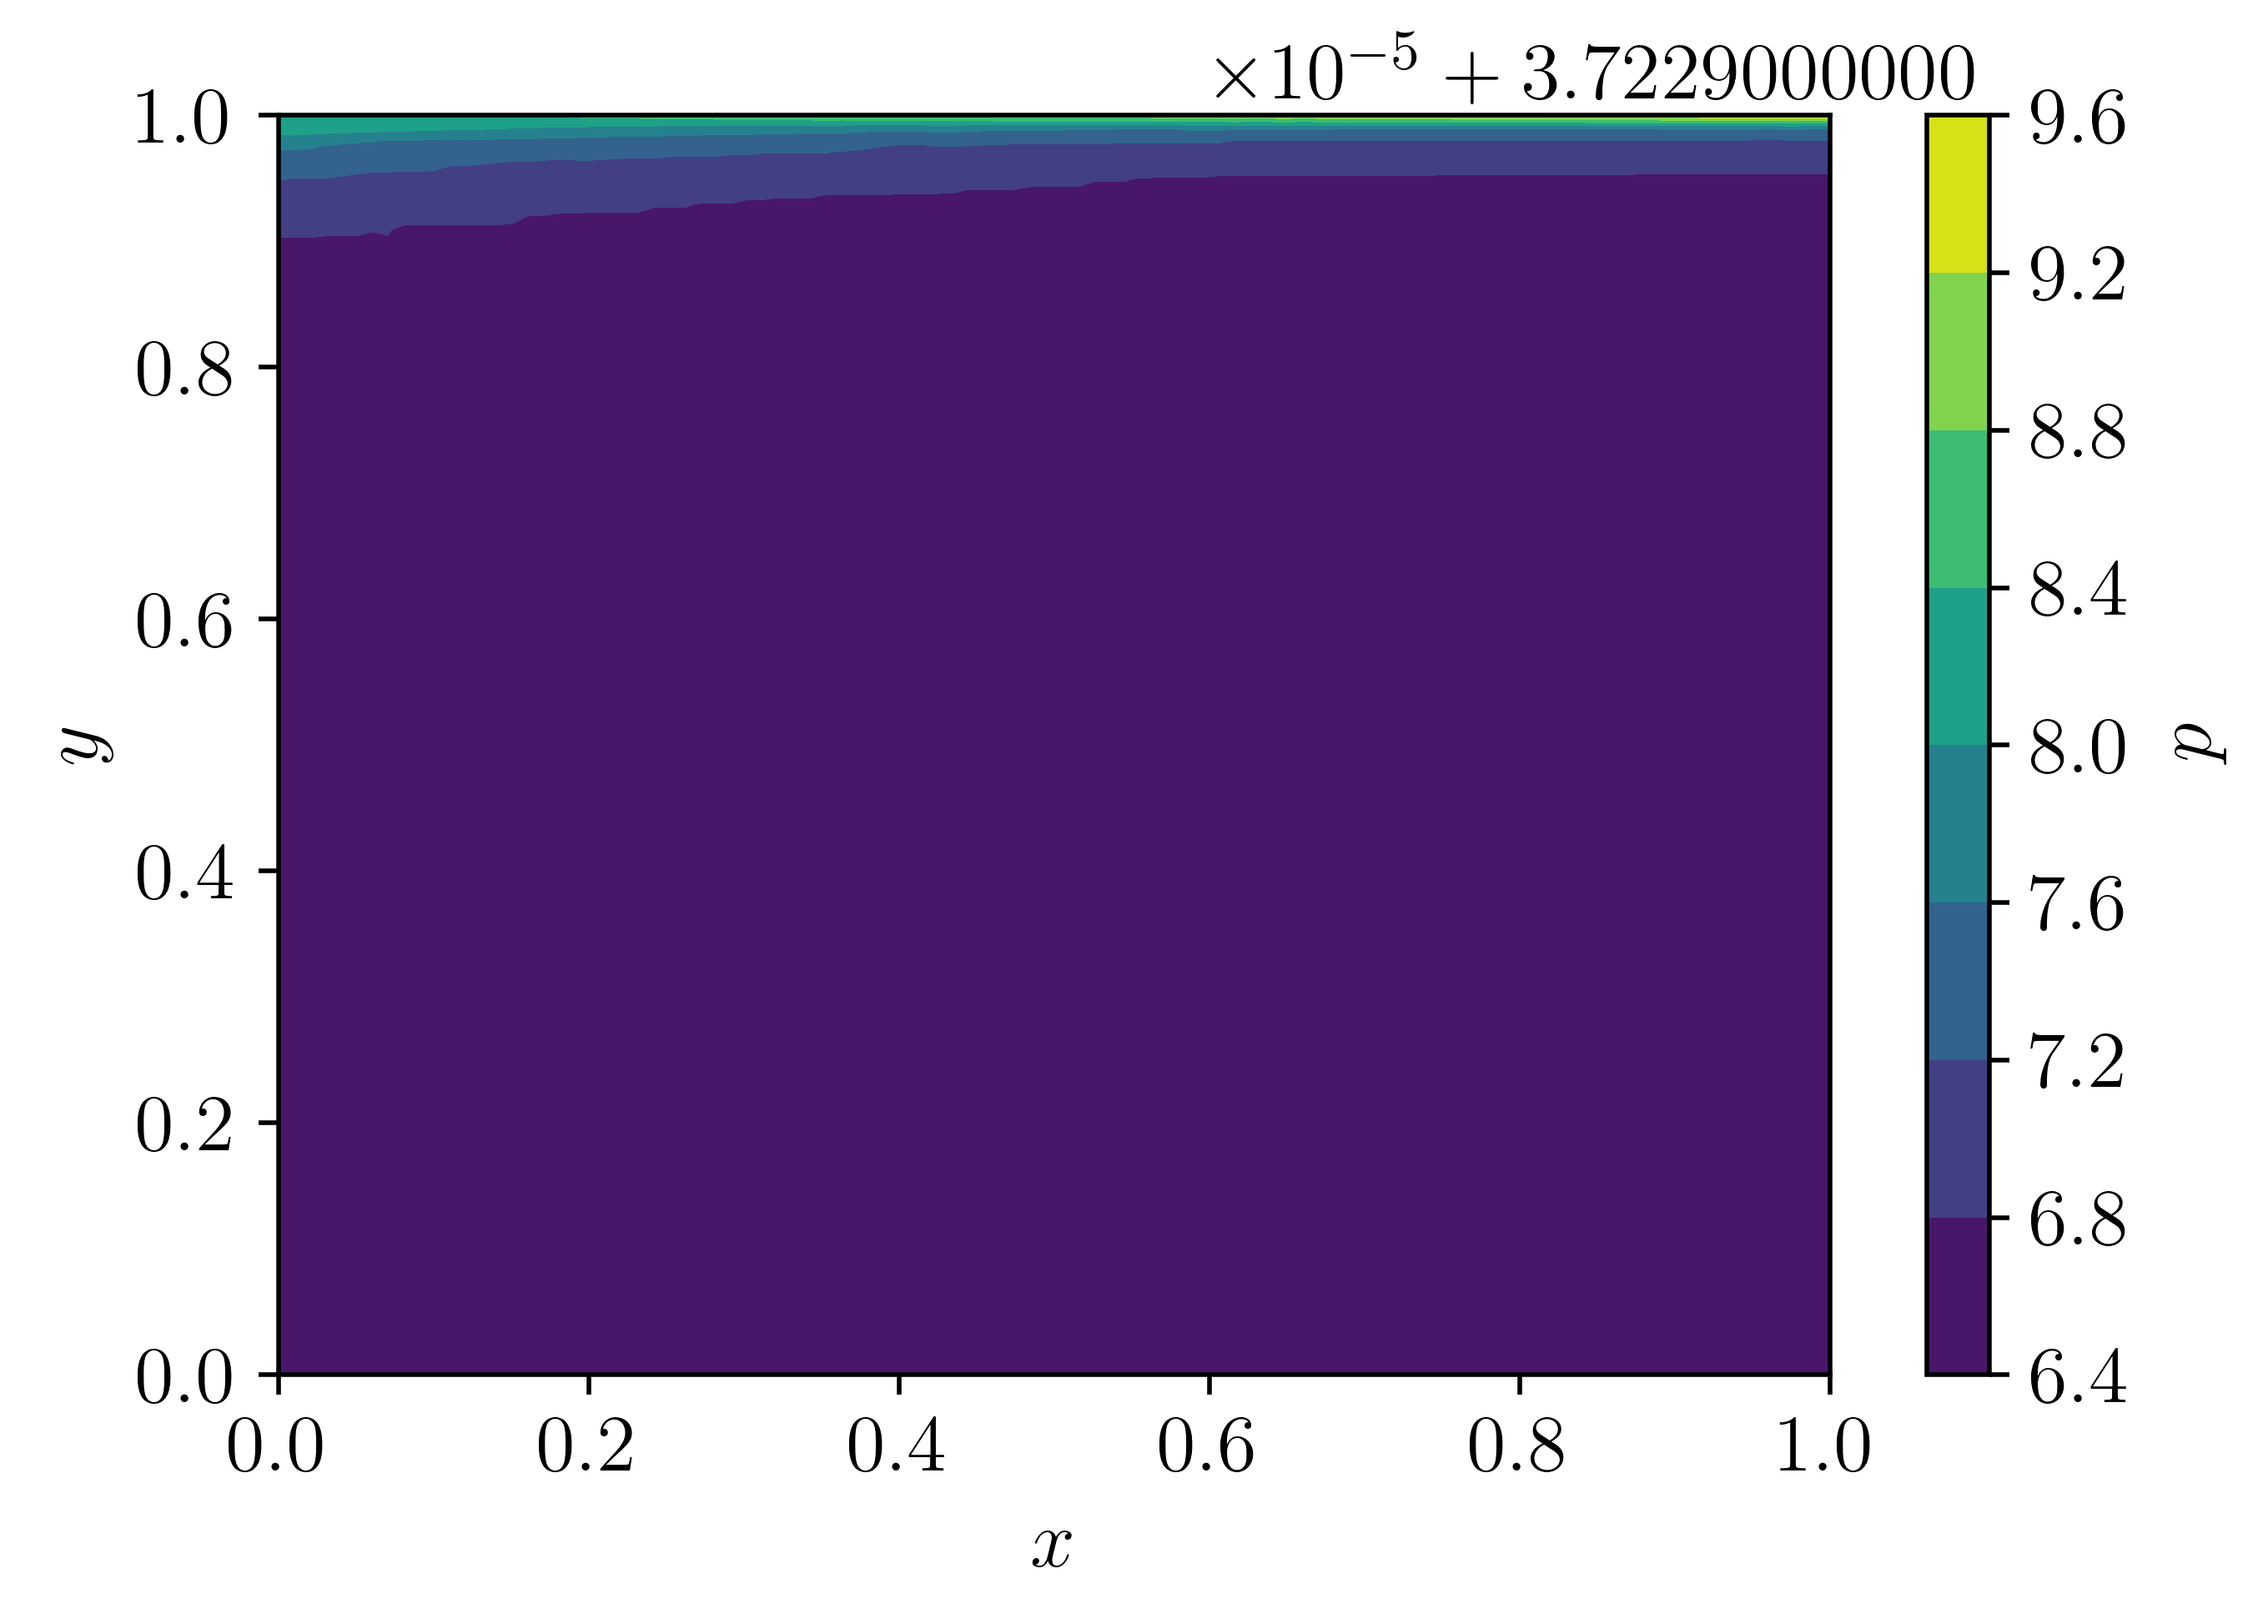

In [8]:
for i in range(len(best_overall)):
    analytics.plot.plot_solution(eqs[i], paths[i] + '/best_setup', mpinn[i], model_wrapper[i], rescale[i])

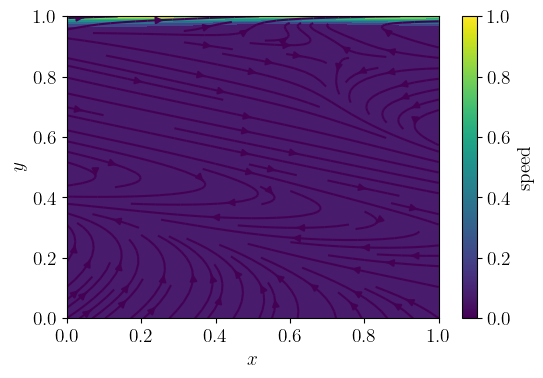

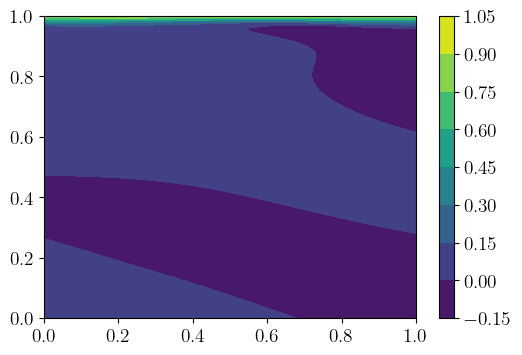

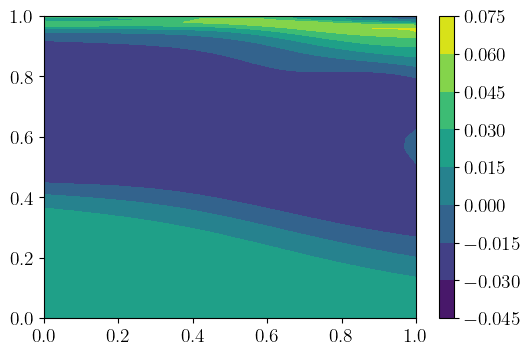

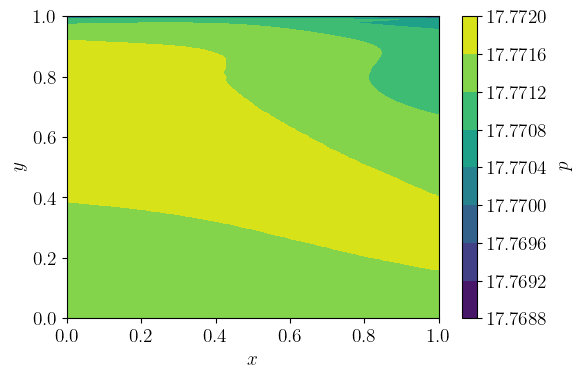

In [4]:
analytics.plot.plot_solution(eq_together, 'data/test_small_scale_4', False, False, None)